In [1]:
%config InlineBackend.figure_format='retina'

import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib.image as mpimg

In [2]:
def findMiss(I_array:np.ndarray, qrange:slice, threshold:float):
    miss = (
        np.nanmean(I_array[:,qrange],axis=1)>1) &\
        (np.nanmean(I_array[:,qrange],axis=1)<threshold)&\
        (np.nanmean(I_array[:,:],axis=1)!=0
    )
    return miss

def findHits(I_array:np.ndarray, qrange:slice, threshold:float, plim:float):
    higher_percentile = np.percentile(I_array[:,qrange], plim)
    hits = (
        (np.nanmean(I_array[:,qrange],axis=1)<=higher_percentile) &\
        (np.nanmean(I_array[:,qrange],axis=1)>threshold)
    )
    return hits

def findIce(I_array:np.ndarray, qrange:slice):
    ice = (np.nanmean(I_array[:,qrange],axis=1)>=100)
    return ice

In [3]:
raw_data_dir = "/xustrg0/2025A8039/"
processed_data_dir = "/UserData/andronis/test_data/processed"

# bg_run_numbers = [str(i) for i in [*range(234103,234107),234114,234118,234122,234128,234144]]
bg_run_numbers = ["234144"]
dark_run_numbers = ["234042"]
run_numbers_38mm = ["234096","234109","234110","234134"]
run_numbers_38mm_ns = ["234134"]
run_numbers_49mm = ["234112","234113"]
run_numbers_49mm_ns = ["234140"]
run_numbers_59mm = ["234116","234117"]
run_numbers_59mm_ns = ["234141"]
run_numbers_69mm = ["234120"]
run_numbers_69mm_ns = ["234142"]
run_numbers_79mm = ["234124","234125"]
run_numbers_79mm_ns = ["234143"]
run_numbers_89mm = ["234126"]
run_numbers_89mm_ns = ["234145"]
run_numbers_104mm_ns = ["234147","234148"]
run_numbers_119mm_ns = ["234149"]

I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)


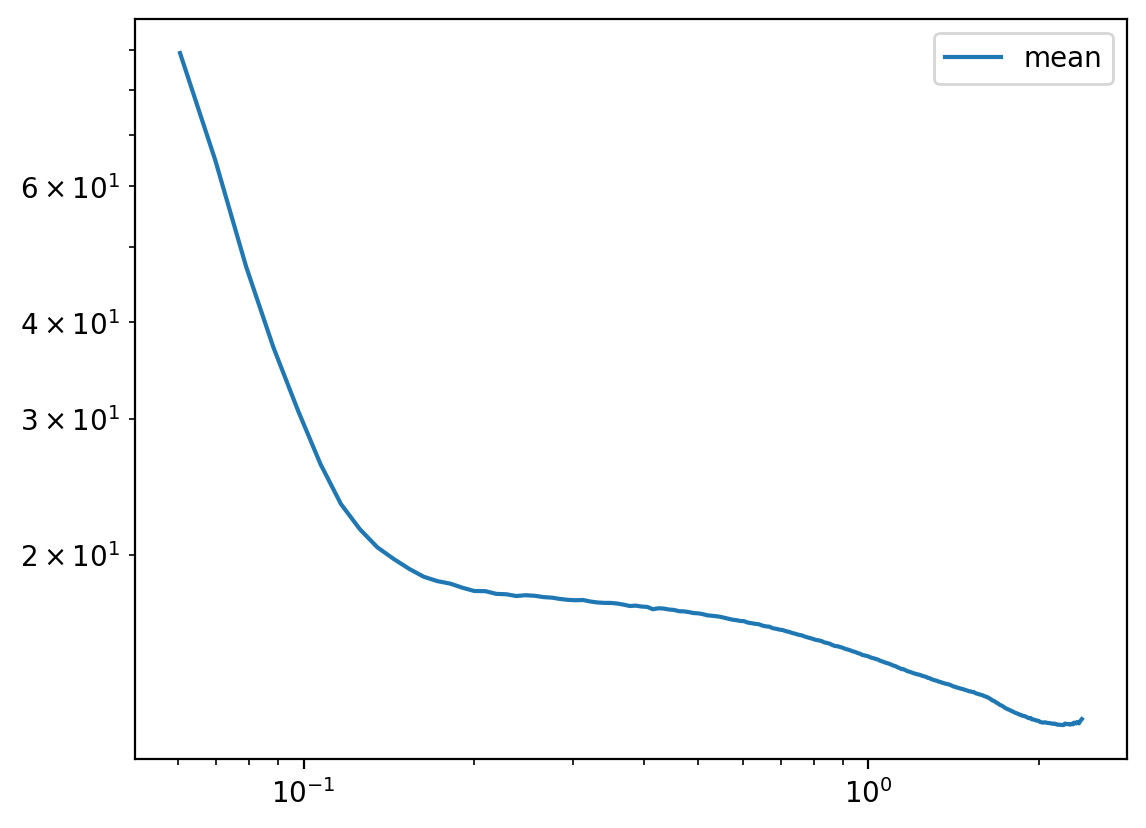

In [4]:
# == Load data == 
I_mean_q_bg = []
for run_number in bg_run_numbers:
    file_path = processed_data_dir + f"/Iq_{run_number}.h5"  
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Combined file not found at: {file_path}")
    # == Load data == 
    file_path = processed_data_dir + f"/Iq_{run_number}.h5"  
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Combined file not found at: {file_path}")

    with h5py.File(file_path, "r") as f:
        I = f["I"][:]
        I[I==0] = np.nan
        q = f["q"][:]
        phi = f["phi"][:]
        image_ids = f["image_id"][:]
        # print("=== Run Metadata ===")
        # for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
        #     if key in f:
        #         print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
        #     else:
        #         print(f"{key}: Not found")

    print(f"I shape: {I.shape}")
    print(f"q shape: {q.shape}, phi shape: {phi.shape}")

    # Mean I(q) over all shots and phi
    # I = np.asanyarray(Iqs)
    I_mean_q_bg.append(np.nanmean(I, axis=(0,1)))
    # plt.loglog(q, np.nanmean(I, axis=(0,1)), label=run_number)
I_mean_q_bg = np.nanmean(I_mean_q_bg, axis=0)
plt.loglog(q, I_mean_q_bg, label="mean")
plt.legend()
plt.show()

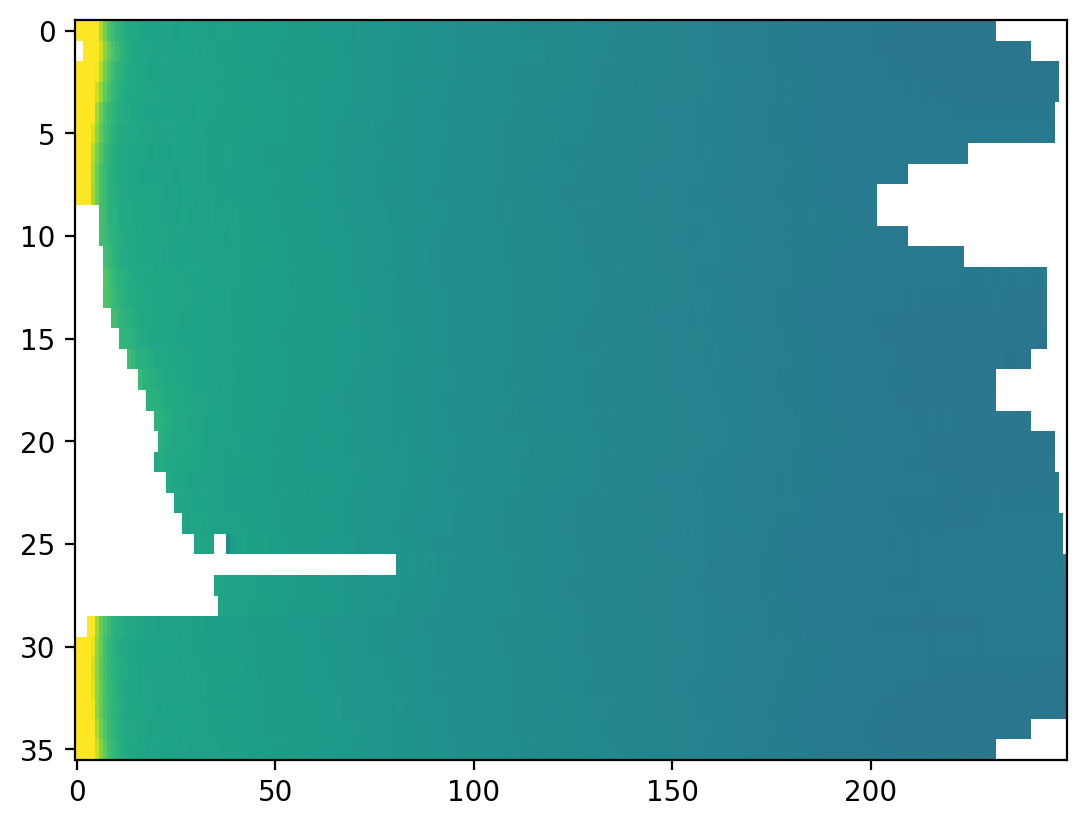

In [5]:
plt.imshow(I.mean(0), aspect="auto", interpolation="none", vmin=0, vmax=30)

I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)


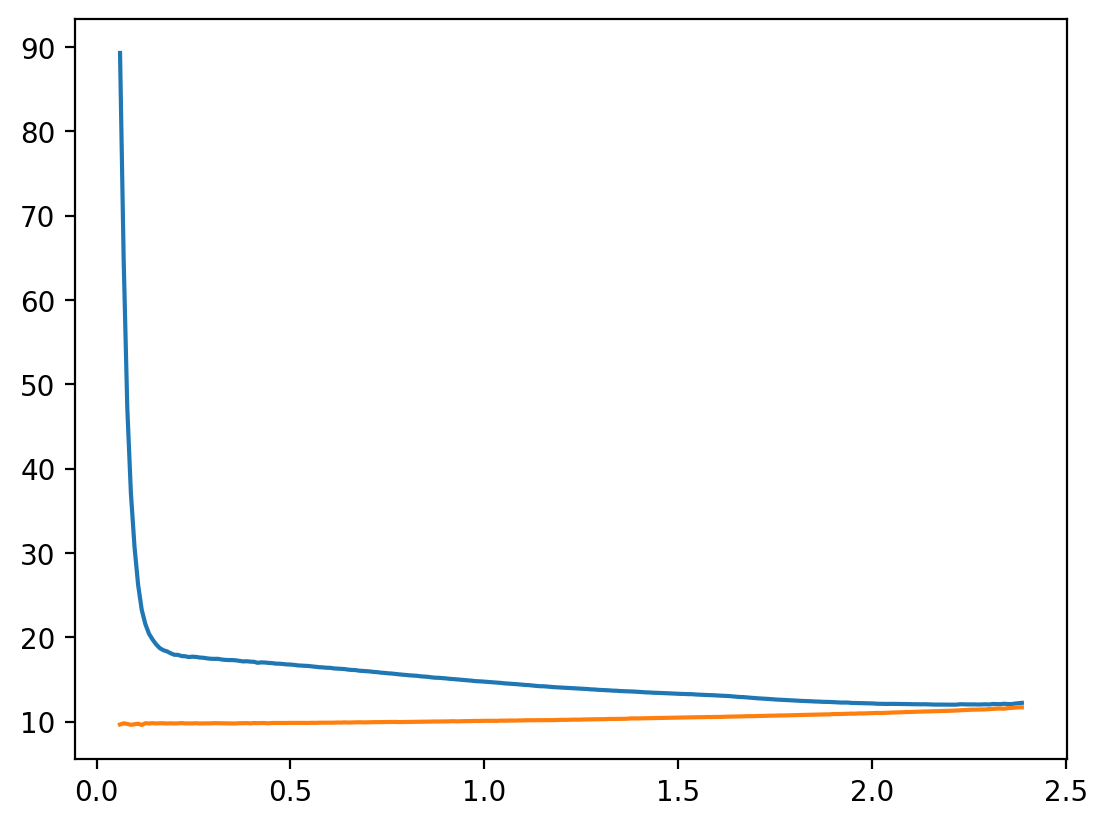

In [6]:
file_path = processed_data_dir + f"/Iq_{dark_run_numbers[0]}.h5"  
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Combined file not found at: {file_path}")
# == Load data == 
file_path = processed_data_dir + f"/Iq_{dark_run_numbers[0]}.h5"  
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Combined file not found at: {file_path}")

with h5py.File(file_path, "r") as f:
    I = f["I"][:]
    I[I==0] = np.nan
    q = f["q"][:]
    phi = f["phi"][:]
    image_ids = f["image_id"][:]
    # print("=== Run Metadata ===")
    # for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
    #     if key in f:
    #         print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
    #     else:
    #         print(f"{key}: Not found")

print(f"I shape: {I.shape}")
print(f"q shape: {q.shape}, phi shape: {phi.shape}")
I_mean_q_dark = np.nanmean(I, axis=(0,1))
plt.plot(q, I_mean_q_bg)
plt.plot(q, I_mean_q_dark)

In [7]:
# plt.figure(figsize=(4, 3))
run_numbers = [
    run_numbers_38mm_ns, 
    run_numbers_49mm_ns,
    run_numbers_59mm_ns,
    run_numbers_69mm_ns,
    run_numbers_79mm_ns,
    run_numbers_89mm_ns,
    run_numbers_104mm_ns
]
distances = [38, 49, 59, 69, 79, 89, 104]
Is = []
I_mean_qs = []
I_mean_phis = []
for r, d in zip(run_numbers, distances):
    if len(r) > 1:
        _Is = []
    for run_number in r:
        file_path = processed_data_dir + f"/Iq_{run_number}.h5"  
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Combined file not found at: {file_path}")
        # == Load data == 
        file_path = processed_data_dir + f"/Iq_{run_number}.h5"  
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Combined file not found at: {file_path}")

        with h5py.File(file_path, "r") as f:
            I = f["I"][:]
            I[I==0] = np.nan
            q = f["q"][:]
            phi = f["phi"][:]
            image_ids = f["image_id"][:]
            # print("=== Run Metadata ===")
            # for key in ["run", "shots", "images", "start_tag", "stop_tag"]:
            #     if key in f:
            #         print(f"{key}: {f[key][()]}")  # f[key][()] loads the scalar value
            #     else:
            #         print(f"{key}: Not found")
        
        print(f"Distance: {d}")
        print(f"I shape: {I.shape}")
        print(f"q shape: {q.shape}, phi shape: {phi.shape}")
        if len(r) > 1:
            _Is.append(np.nanmean(I, axis=1))
    if len(r) > 1:
        Is.append(np.nanmean(_Is, axis=0))
    else:
        Is.append(np.nanmean(I, axis=1))
        # Mean I(q) over all shots and phi
        # I = np.asanyarray(Iqs)
#         I_mean_q = np.nanmean(I, axis=(0,1)) - I_mean_q_bg
#         I_mean_q /= I_mean_q.sum()
#         I_mean_qs.append(I_mean_q)

#         # Mean I(phi) over all shots and q
#         I_mean_phi = np.nanmean(I, axis=(0, 2))
#         I_mean_phis.append(I_mean_phi)
Is = np.asarray(Is)

Distance: 38
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 49
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 59
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 69
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 79
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 89
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 104
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)
Distance: 104
I shape: (5999, 36, 250)
q shape: (250,), phi shape: (36,)


/home/andronis/venvs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


In [10]:
np.savez_compressed("iqs.npz", Is)

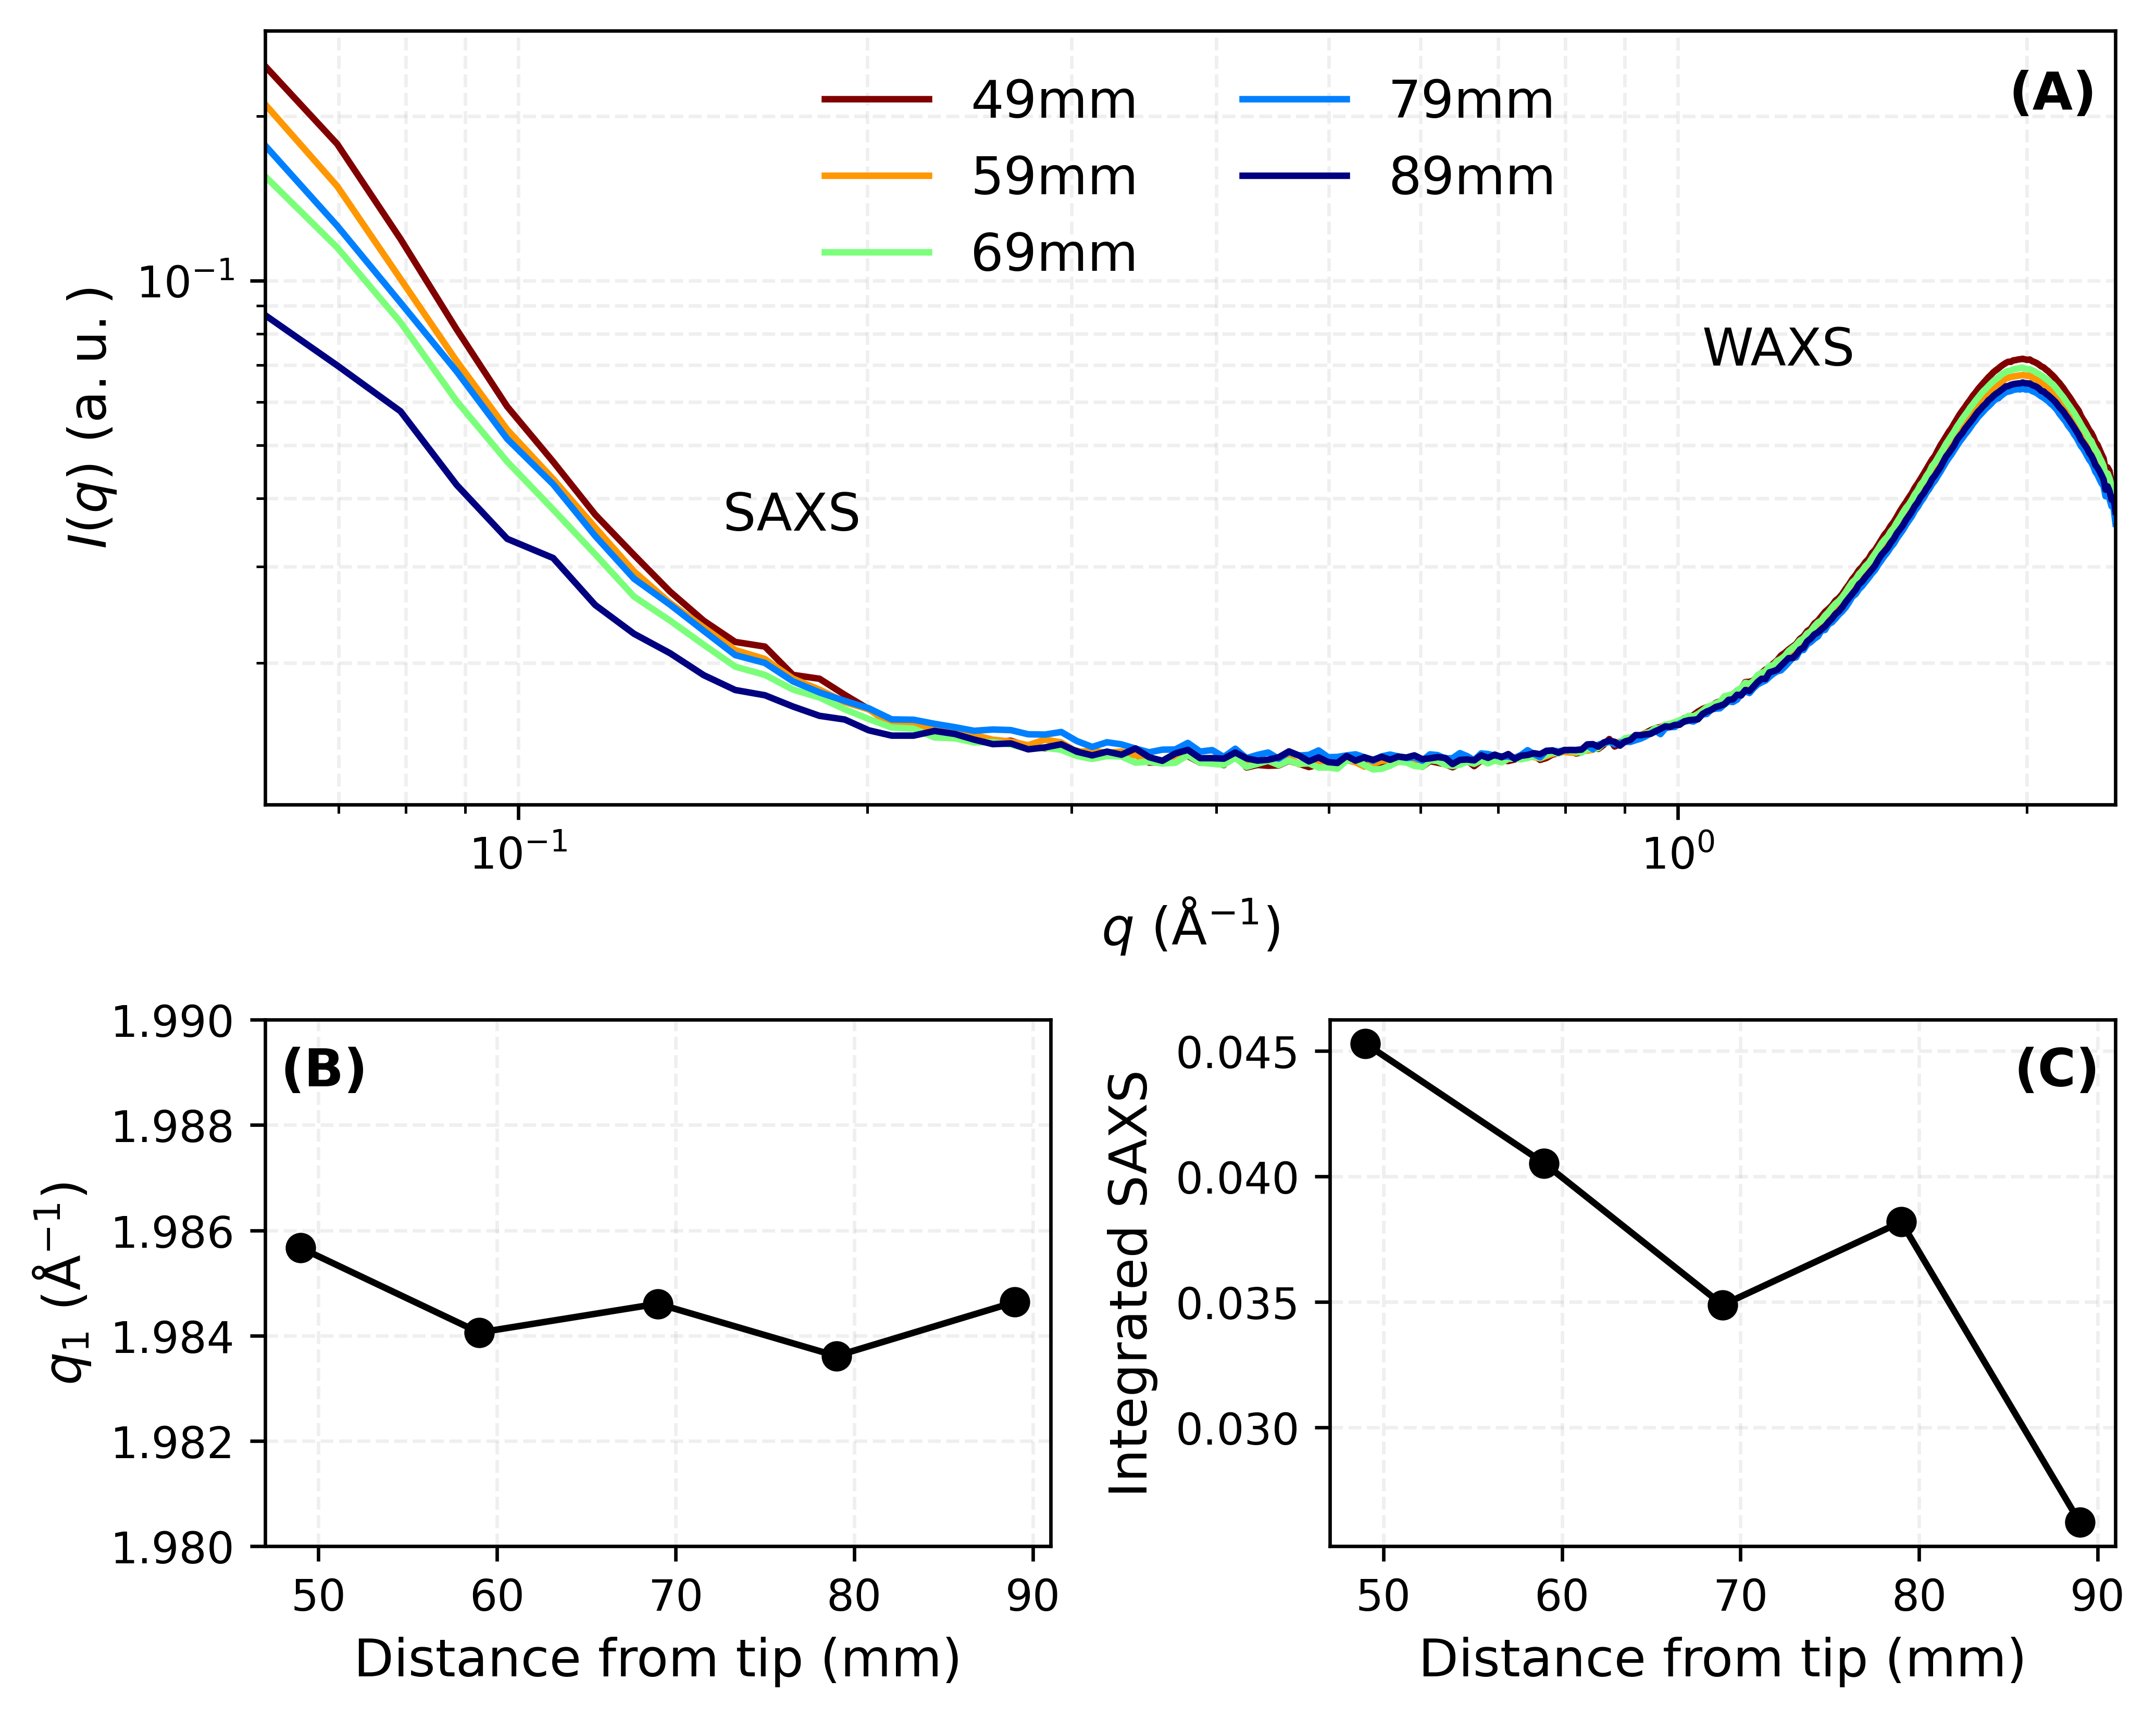

In [264]:
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec

def gaussian(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

fig = plt.figure(layout='tight', figsize=(3.5*2, 3.5*1.6), dpi=300)
G = GridSpec(7,2)
ax_main = fig.add_subplot(G[0:4,:])
popts = []
pcovs = []
saxs = []
colors = plt.get_cmap("jet_r", len(Is)-2)
thrs = 14
qr = slice(180,210)
saxs_qrange = (q>q.min())&(q<0.15)
misses = findMiss(Is[-1], qr, thrs)
hits = findHits(Is[-1], qr, thrs, 95)
iq_plot_bg = np.nanmean(Is[-1][misses], axis=0)
for idx, (i, d) in enumerate(zip(Is[1:-1], distances[1:-1])):
    if d == 89:
        thrs = 15
    misses = findMiss(i, qr, thrs)
    hits = findHits(i, qr, thrs, 95)
    misses = findMiss(i, qr, thrs)
    hits = findHits(i, qr, thrs, 95)
    iq_plot = np.nanmean(i[hits], axis=0) - I_mean_q_bg
    iq_plot /= np.trapz(iq_plot[30:120], dx=q[30+1:120])
    # iq_plot /= iq_plot[100]
    ax_main.loglog(q, iq_plot, label=f"{d}mm", color=colors(idx))
    fit_range = slice(170, 220)
    popt, pcov = curve_fit(gaussian, q[fit_range], iq_plot[fit_range], p0=[0.25, 1.9, 1])
    popts.append(popt)
    pcovs.append(pcov)
    saxs.append(np.trapz(iq_plot[saxs_qrange], dx=q[saxs_qrange][:-1]))
ax_main.set_xlim(q.min(),q.max())
ax_main.set_xlabel("$q~(\mathrm{\AA}^{-1})$", fontsize=12)
ax_main.set_ylabel("$I(q)~\mathrm{(a.u.)}$", fontsize=12)
ax_main.grid(True, ls="--", alpha=0.2, which='both')
ax_main.legend(frameon=False, ncol=2, loc="upper center", fontsize=12)
ax_main.text(1.05, 0.07, "WAXS", fontsize=12)
ax_main.text(0.15, 0.035, "SAXS", fontsize=12)
ax_main.text(.99, .95, "(A)", fontsize=12, weight="bold", ha="right", va="top", transform=ax_main.transAxes)

ax_q1 = fig.add_subplot(G[4:7,0])
ax_q1.plot(distances[1:-1], np.array(popts)[:, 1], "o-k")
ax_q1.set_ylabel("$q_1~(\mathrm{\AA^{-1})}$", fontsize=12)
ax_q1.set_xlabel("Distance from tip (mm)", fontsize=12)
ax_q1.grid(True, ls="--", alpha=0.2, which='major')
ax_q1.set_ylim(1.98, 1.99)
ax_q1.text(.02, .95, "(B)", fontsize=12, weight="bold", ha="left", va="top", transform=ax_q1.transAxes)

ax_saxs = fig.add_subplot(G[4:7,1])
ax_saxs.plot(distances[1:-1], np.array(saxs), "o-k")
ax_saxs.set_xlabel("Distance from tip (mm)", fontsize=12)
ax_saxs.set_ylabel("Integrated SAXS", fontsize=12)
ax_saxs.grid(True, ls="--", alpha=0.2, which='major')
ax_saxs.text(.98, .95, "(C)", fontsize=12, weight="bold", ha="right", va="top", transform=ax_saxs.transAxes)

plt.savefig("images/iqs_distances.png", dpi=300)
plt.show()

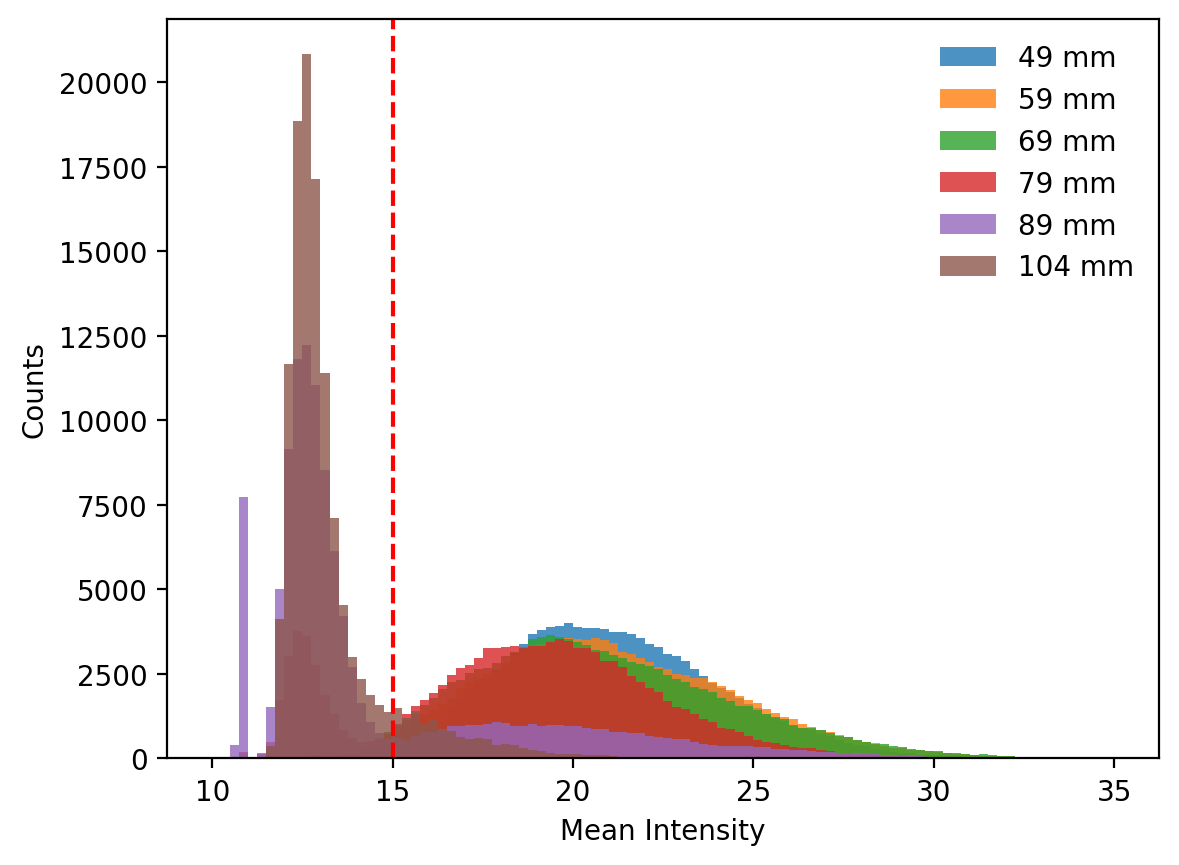

In [231]:
with h5py.File(f"/UserData/andronis/test_data/processed/converted/{run_number}.h5") as f:
    pulse_energy = f[f"run_{run_number}/event_info/bm_1_signal_in_joule"][1:]*7.5e4
nan_idxs = (~np.isnan(pulse_energy))
for i in range(1, len(Is)):
    plt.hist(Is[i][:,180:200].flatten(), bins=100, label=f"{distances[i]} mm", alpha=0.8, range=(10, 35))
# plt.xlim(0, 5999)
plt.axvline(15, c="r", ls="--")
plt.ylabel("Counts")
plt.xlabel("Mean Intensity")
# plt.savefig("images/mean_intensity_water.svg")
plt.legend(frameon=False)
plt.show()

In [26]:
np.percentile(Is[-1][:,190:210], 10)

11.82048225402832

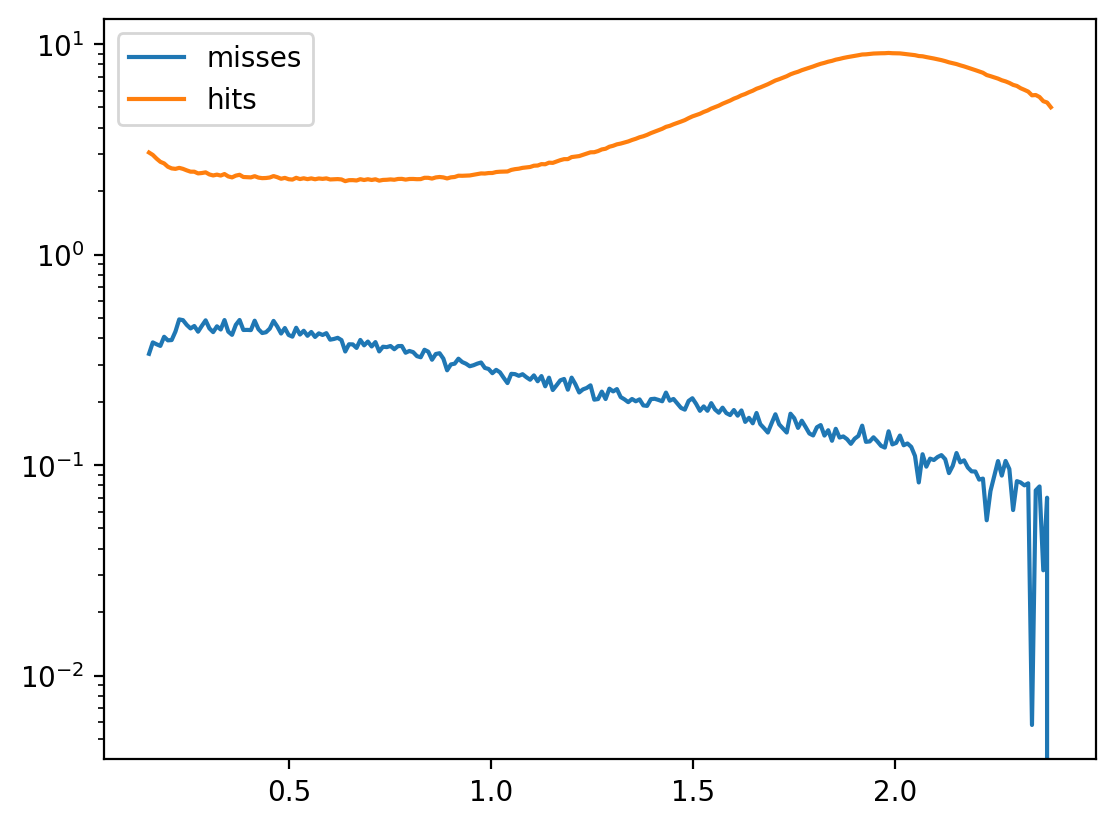

In [21]:
i = Is[-1]
thrs = 15
qr = slice(180,210)
misses = findMiss(i, qr, thrs)
hits = findHits(i, qr, thrs)
ice = findIce(i, qr)
iq_plot_misses = np.nanmean(i[misses], axis=0) - I_mean_q_bg 
iq_plot_hits = np.nanmean(i[hits], axis=0) - I_mean_q_bg
plt.semilogy(q[10:], iq_plot_misses[10:], label="misses")
plt.semilogy(q[10:], iq_plot_hits[10:], label="hits")
# plt.semilogy(q[10:], I_mean_q_bg[10:], label="bg")
plt.legend()
plt.show()

In [116]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from pathlib import Path
from tqdm.notebook import tqdm

def read_img(name):
    try:
        img = mpimg.imread(name)
        return img
    except: 
        return("Did not find image")

run_number = 234148
files = list(Path(raw_data_dir, str(run_number)).glob("*"))[::100]
future_to_file = {}
images = np.zeros((len(files), 1920, 1920))

with ThreadPoolExecutor(max_workers=4) as executor:
    for file in files:
        future = executor.submit(read_img, file)
        future_to_file[future] = file
    
    for idx, future in tqdm(enumerate(as_completed(future_to_file)), total=60):
        file = future_to_file[future]
        img_read = future.result()
        if img_read != 'Did not find image':
            images[idx] = img_read
# images = np.asarray(images_read)
# del images_read
mean_img = images.mean(0)

  0%|          | 0/60 [00:00<?, ?it/s]

/home/andronis/venvs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [117]:
run_number = 234144
files = list(Path(raw_data_dir, str(run_number)).glob("*"))[0:1]
future_to_file = {}
images = np.zeros((len(files), 1920, 1920))

with ThreadPoolExecutor(max_workers=4) as executor:
    for file in files:
        future = executor.submit(read_img, file)
        future_to_file[future] = file
    
    for idx, future in tqdm(enumerate(as_completed(future_to_file)), total=60):
        file = future_to_file[future]
        img_read = future.result()
        if img_read != 'Did not find image':
            images[idx] = img_read
# images = np.asarray(images_read)
# del images_read
mean_img_bg = images.mean(0)

  0%|          | 0/60 [00:00<?, ?it/s]

/home/andronis/venvs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [118]:
mask = np.load("/home/andronis/exp/SACLA_2025A8039/Analysis/mask.npy")

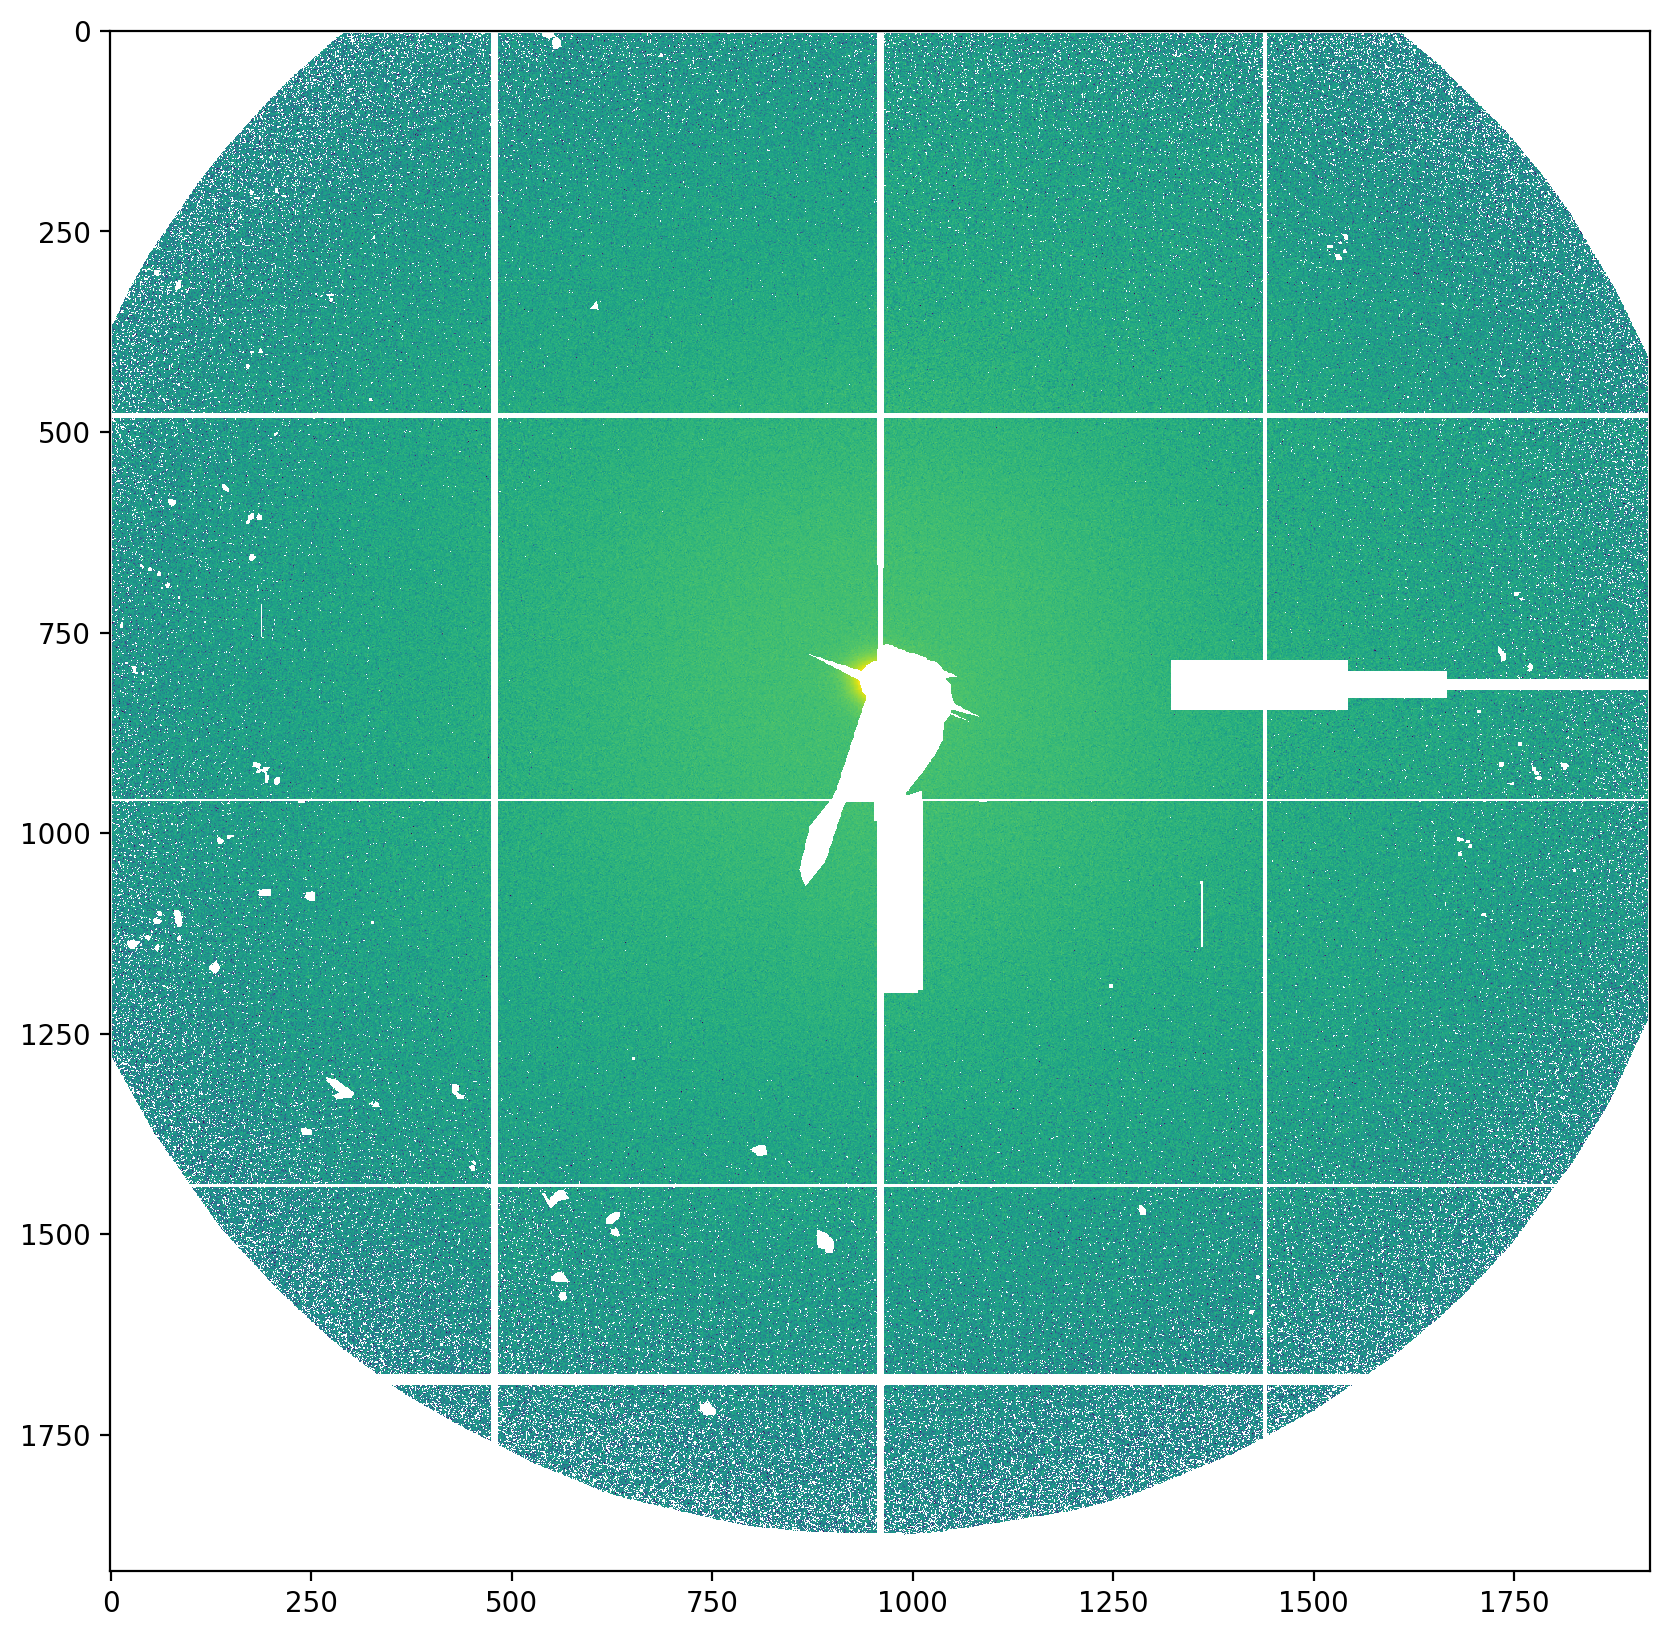

In [119]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(10,10))
plt.imshow((mean_img-mean_img_bg)*(~mask.astype(bool)), norm=LogNorm(), interpolation="none")
plt.show()

In [120]:
import pyFAI

poni_file = "/home/seoyoung/2025_05_SACLA/results/avg_img/run234059_avg_img.poni"

ai = pyFAI.load(poni_file)
# polarization = ai.guess_polarization(mean_img, npt_rad=250, npt_azim=360, unit='q_A^-1')
I, q, phi = ai.integrate2d_ng(
    mean_img, 250, 36, mask=mask,
    correctSolidAngle=False, unit="q_A^-1", polarization_factor=-0.55
)
I[I==0] = np.nan

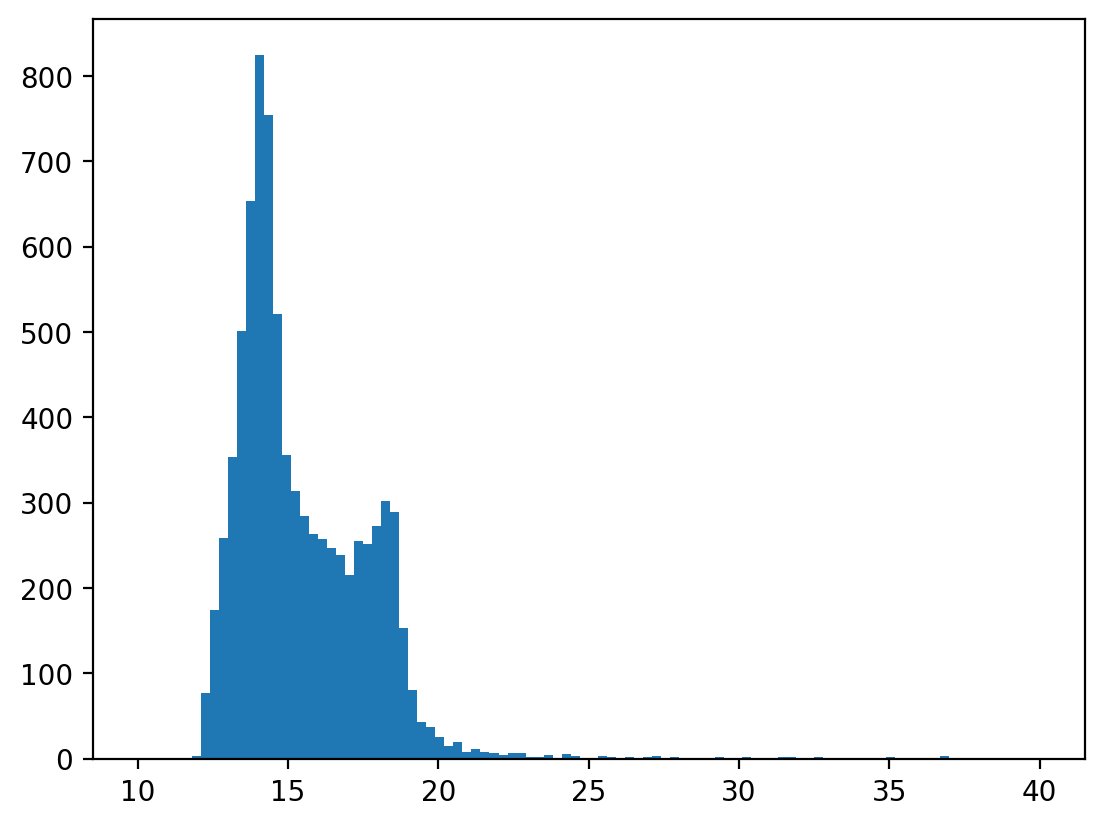

In [121]:
plt.hist(I.flatten(), bins=100, range=[10, 40])
plt.show()

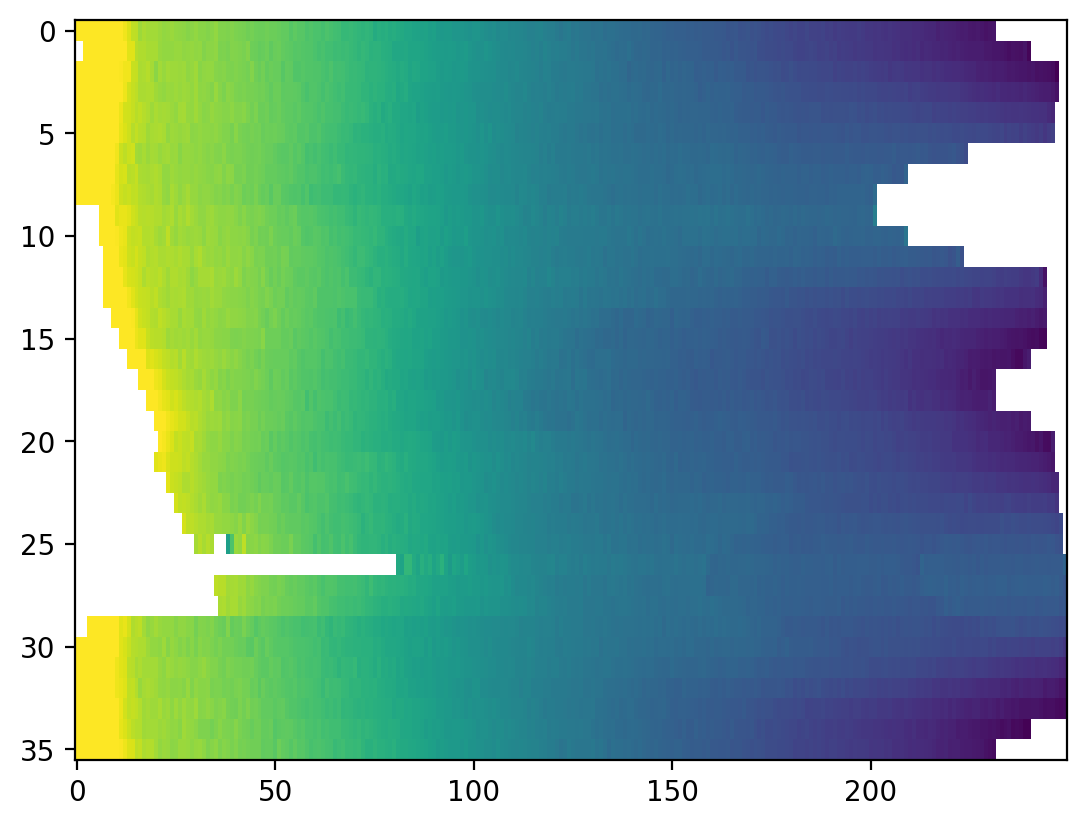

In [122]:
plt.imshow(I, aspect="auto", norm=LogNorm(vmax=20), interpolation="none")

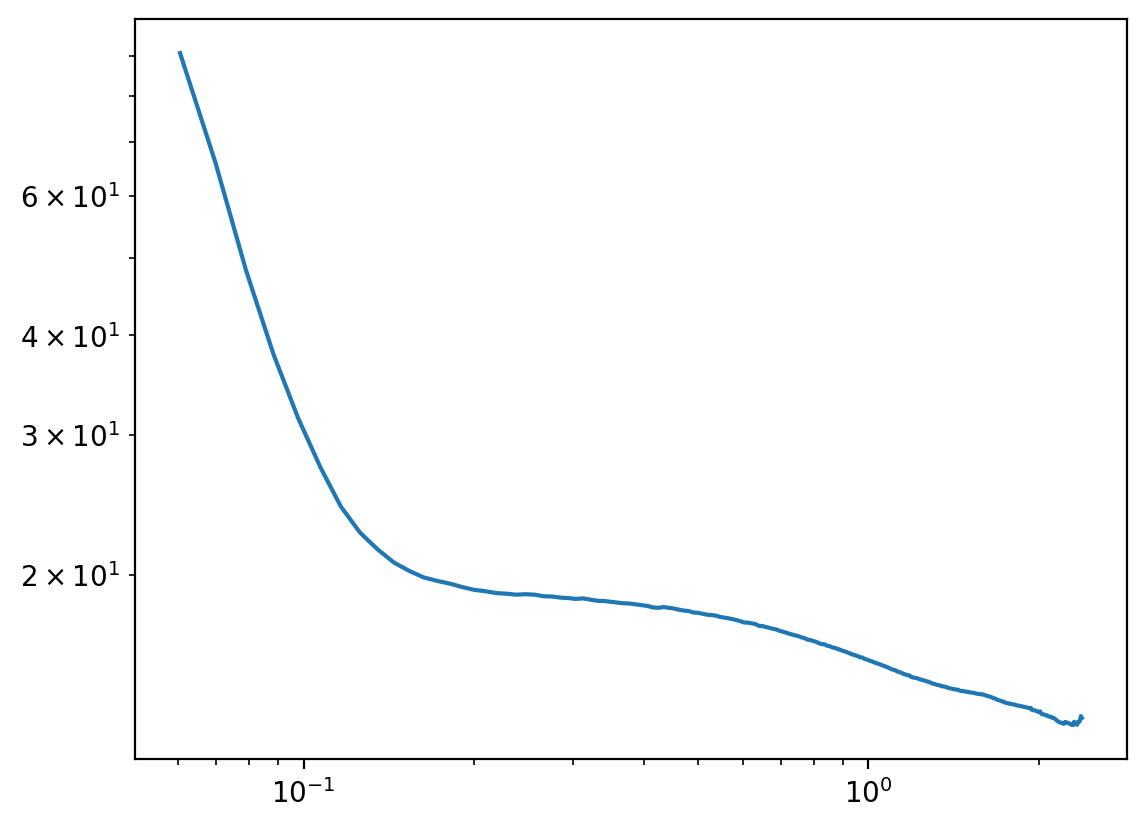

In [123]:
# I -= I_mean_q_bg
plt.loglog(q, np.nanmean(I, 0))

In [73]:
polarization

-0.3506390061739413